<a href="https://colab.research.google.com/github/jesvin1/PortfolioManagement/blob/master/Protfolio%20management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
assets = ['HDFCBANK.NS', 'RELIANCE.NS','TCS.NS']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [3]:
pf_data.tail()

,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Date,,,
2020-05-04,923.000000,1435.199951,1930.449951
2020-05-05,911.450012,1460.650024,1932.750000
2020-05-06,946.400024,1460.750000,1903.599976
2020-05-07,925.000000,1506.949951,1891.650024
2020-05-08,929.049988,1561.800049,1893.400024


In [0]:
pf_data['HDFC_Ret'] = pf_data['HDFCBANK.NS']/pf_data['HDFCBANK.NS'].iloc[0]
pf_data['RELIANCE_Ret'] = pf_data['RELIANCE.NS']/pf_data['RELIANCE.NS'].iloc[0]
pf_data['TCS_Ret'] = pf_data['TCS.NS']/pf_data['TCS.NS'].iloc[0]

In [5]:
pf_data['HDFCBANK.NS'].iloc[0]

132.50143432617188

In [0]:
pf_data['HDFC_Ret_al'] = pf_data['HDFC_Ret'] *.6
pf_data['RELIANCE_Ret_al'] = pf_data['RELIANCE_Ret']*.1
pf_data['TCS_Ret_al'] = pf_data['TCS_Ret'] *.3

In [0]:
pf_data['HDFC_Ret_pos'] = pf_data['HDFC_Ret_al'] *200000
pf_data['RELIANCE_Ret_pos'] = pf_data['RELIANCE_Ret_al']*200000
pf_data['TCS_Ret_pos'] = pf_data['TCS_Ret_al']*200000
pf_data['Total_pos'] = pf_data['HDFC_Ret_pos'] +  pf_data['RELIANCE_Ret_pos'] +  pf_data['TCS_Ret_pos']

Text(0.5, 1.0, 'Total Position')

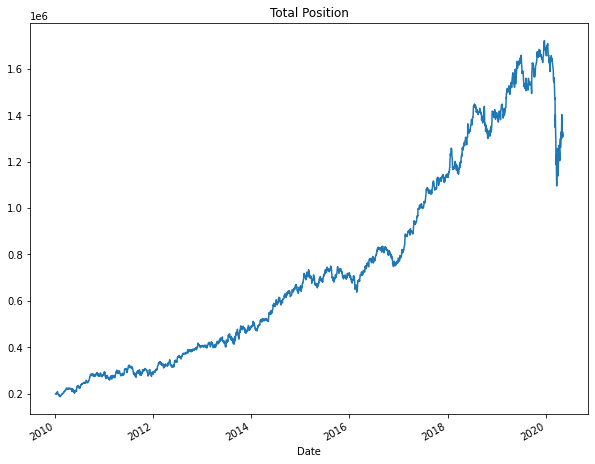

In [8]:
pf_data['Total_pos'].plot(figsize=(10,8))
plt.title('Total Position')

In [23]:
pf_data.tail()

,HDFCBANK.NS,RELIANCE.NS,TCS.NS,HDFC_Ret,RELIANCE_Ret,TCS_Ret,HDFC_Ret_al,RELIANCE_Ret_al,TCS_Ret_al,HDFC_Ret_pos,RELIANCE_Ret_pos,TCS_Ret_pos,Total_pos,Daily_Ret
Date,,,,,,,,,,,,,,
2020-05-04,923.000000,1435.199951,1930.449951,6.965962,3.150296,6.892212,4.179577,0.315030,2.067664,835915.479431,63005.926990,413532.722353,1.312454e+06,-0.064648
2020-05-05,911.450012,1460.650024,1932.750000,6.878794,3.206160,6.900424,4.127276,0.320616,2.070127,825455.226361,64123.196716,414025.428964,1.303604e+06,-0.006743
2020-05-06,946.400024,1460.750000,1903.599976,7.142564,3.206379,6.796351,4.285539,0.320638,2.038905,857107.724963,64127.585689,407781.035555,1.329016e+06,0.019494
2020-05-07,925.000000,1506.949951,1891.650024,6.981057,3.307789,6.753686,4.188634,0.330779,2.026106,837726.780578,66155.784442,405221.168184,1.309104e+06,-0.014983
2020-05-08,929.049988,1561.800049,1893.400024,7.011622,3.428186,6.759934,4.206973,0.342819,2.027980,841394.654346,68563.728537,405596.045691,1.315554e+06,0.004928


In [0]:
pf_data['Daily_Ret'] = pf_data['Total_pos'].pct_change(1)

In [14]:
pf_data.mean()

HDFCBANK.NS            545.684709
RELIANCE.NS            623.941867
TCS.NS                1042.680318
HDFC_Ret                 4.118331
RELIANCE_Ret             1.369567
TCS_Ret                  3.722642
HDFC_Ret_al              2.470998
RELIANCE_Ret_al          0.136957
TCS_Ret_al               1.116793
HDFC_Ret_pos        494199.670015
RELIANCE_Ret_pos     27391.330172
TCS_Ret_pos         223358.512896
Total_pos           744949.513082
Daily_Ret                0.000814
dtype: float64

In [15]:
pf_data['Daily_Ret'].std()

0.012149300376893843

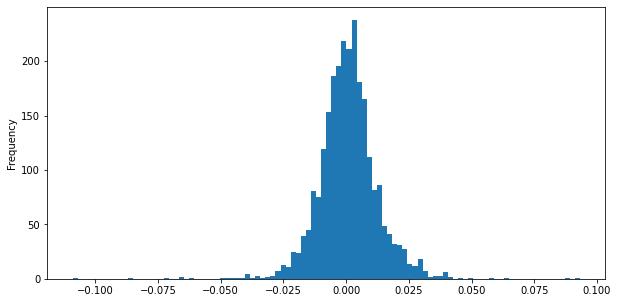

In [17]:
pf_data['Daily_Ret'].plot(kind='hist',bins=100,figsize=(10,5))

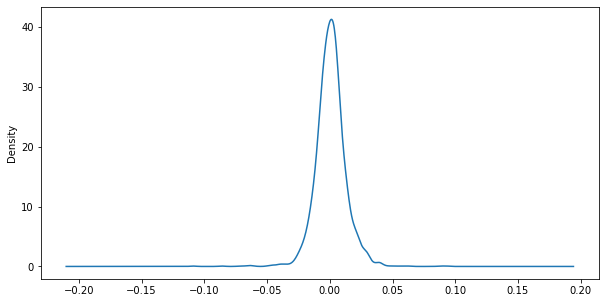

In [18]:
pf_data['Daily_Ret'].plot(kind='kde',figsize=(10,5))

In [0]:
cumuliative_return = 100* (pf_data['Total_pos'][-1]/pf_data['Total_pos'][0] -1)

In [24]:
pf_data['Total_pos'][-1]

1315554.428573778

In [21]:
cumuliative_return

557.7772142868889

In [25]:
#Sharp Ratio
sr = pf_data['Daily_Ret'].mean()/pf_data['Daily_Ret'].std()
sr

0.06700092655554549

In [27]:
#Annualized Sharp ratio

asr = np.sqrt(252) * sr
asr

1.0636067356612608